In [1]:
import sys
sys.path.append('..')

In [2]:
import cv2
from deskew import determine_skew
from paddleocr import PaddleOCR
from skimage.color import rgb2gray
from skimage.transform import rotate
from skimage.io import imshow, show

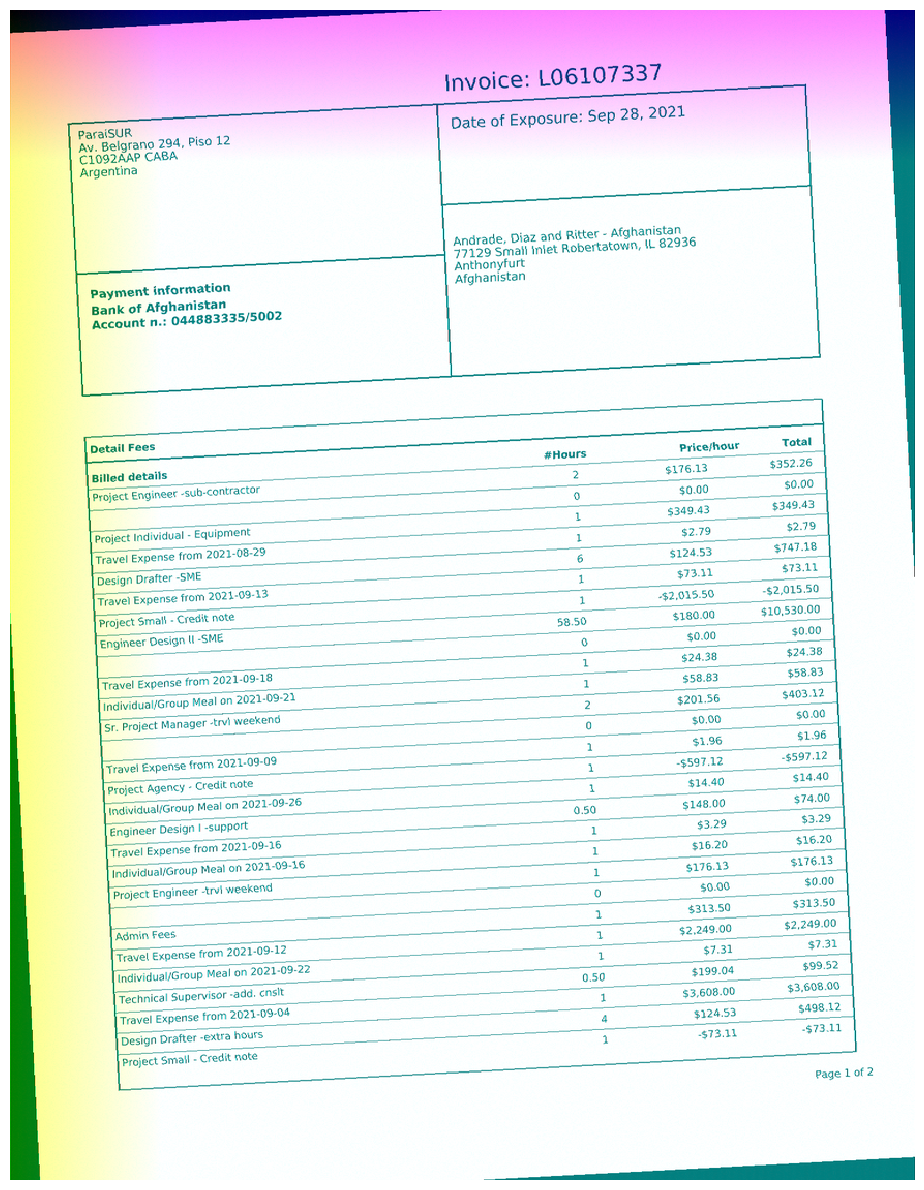

In [15]:
import matplotlib.pyplot as plt

image = cv2.imread("../data-extracted/Invoice (4990).pdf/0.png")

plt.figure(figsize=(12, 12))
plt.axis('off')
imshow(image)

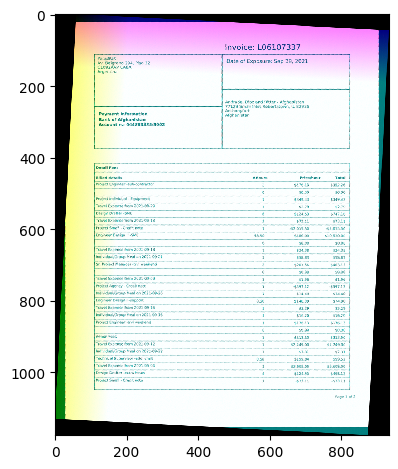

In [4]:
from matplotlib.image import imsave

angle = determine_skew(image)

image_deskew = rotate(image, angle, resize=True)
image_deskew = (image_deskew * 255).astype("uint8") # volver a 0-255

imsave("image.png", image)
imsave("image_deskew.png", image_deskew)
imshow(image_deskew)


In [5]:
from lib.ocr import OCRParams, run_ocr_image

for path in ["image.png"]:
    ocr = run_ocr_image("image.png", OCRParams(engine="paddleocr", deskew=True))["boxes"]

    image = cv2.imread(path)

    for item in ocr:
        box = item["bounds"]
        cv2.rectangle(image, box[0], box[2], (0, 255, 0), 2)
        cv2.putText(
            image,
            item["text"],
            box[0],
            cv2.FONT_HERSHEY_SIMPLEX,
            0.4,
            (0, 0, 255),
            1,
            cv2.LINE_AA,
        )

    cv2.imwrite(path + "_ocr.png", image)


Initializing PaddleOCR instance...
